<a href="https://colab.research.google.com/github/maxenlee/Deep-Dive/blob/main/You_R_a_pirate.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[1] 3

    names                ages      
 Length:3           Min.   :25.00  
 Class :character   1st Qu.:27.50  
 Mode  :character   Median :30.00  
                    Mean   :31.67  
                    3rd Qu.:35.00  
                    Max.   :40.00  

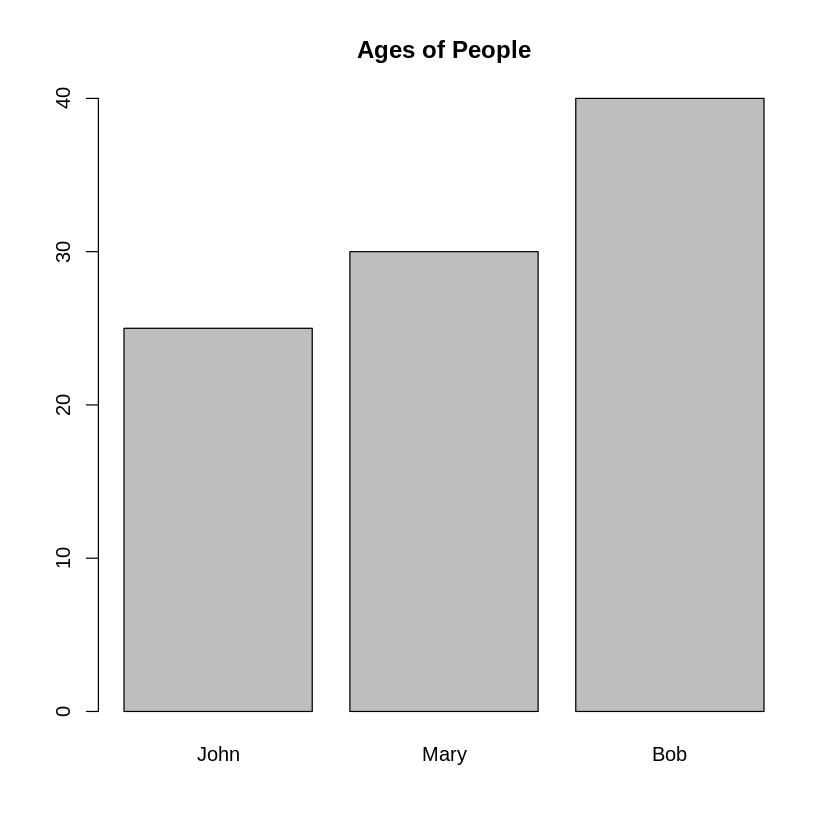

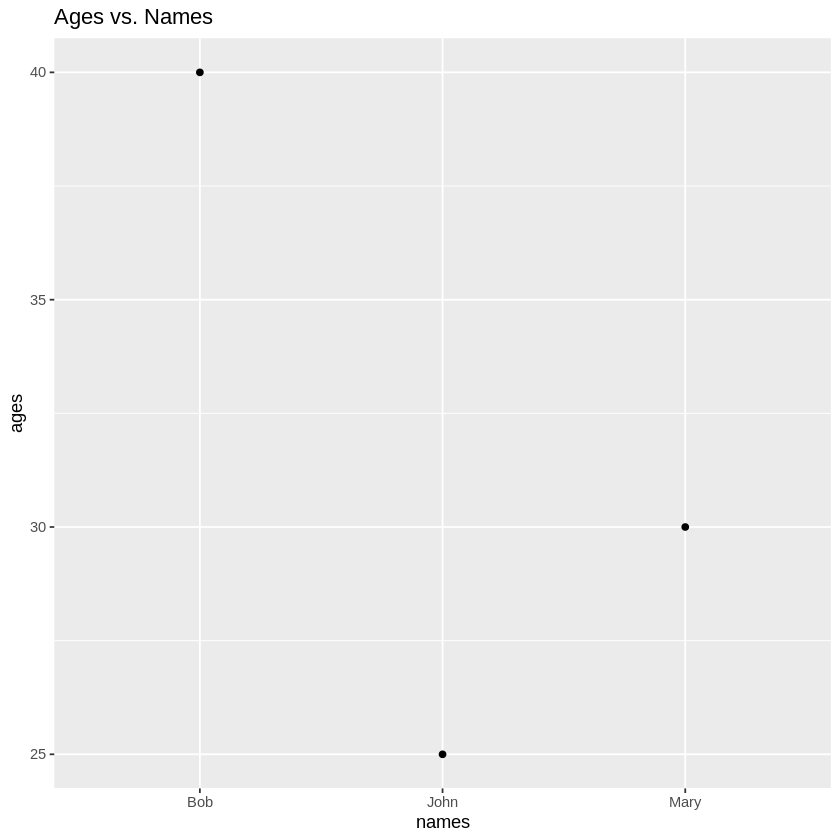

In [8]:

# Create a vector of numbers
numbers <- c(1, 2, 3, 4, 5)

# Create a data frame of names and ages
names <- c("John", "Mary", "Bob")
ages <- c(25, 30, 40)
df <- data.frame(names, ages)

# Print the mean of the numbers vector
mean(numbers)

# Print the summary of the data frame
summary(df)

# Create a bar chart of the ages
barplot(ages, names.arg = names, main = "Ages of People")

# Load the ggplot2 package
library(ggplot2)

# Create a scatter plot of ages vs. names using ggplot2
ggplot(df, aes(x = names, y = ages)) +
  geom_point() +
  labs(title = "Ages vs. Names")


[1] 1 2 3 4 5
  names ages
1  John   25
2  Mary   30
3   Bob   40
[1] 31.66667


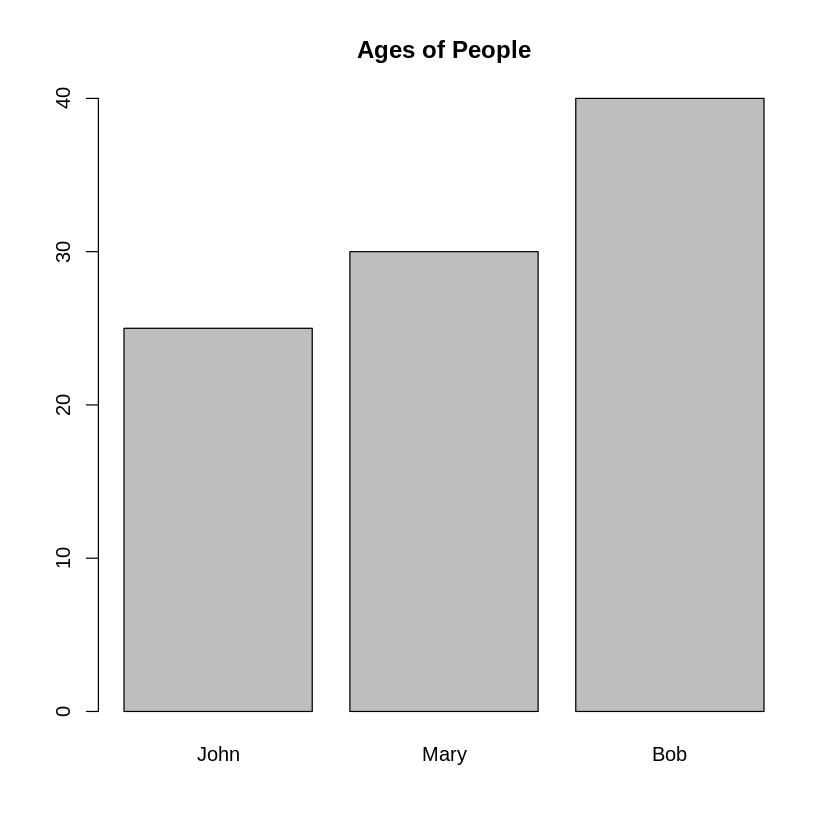

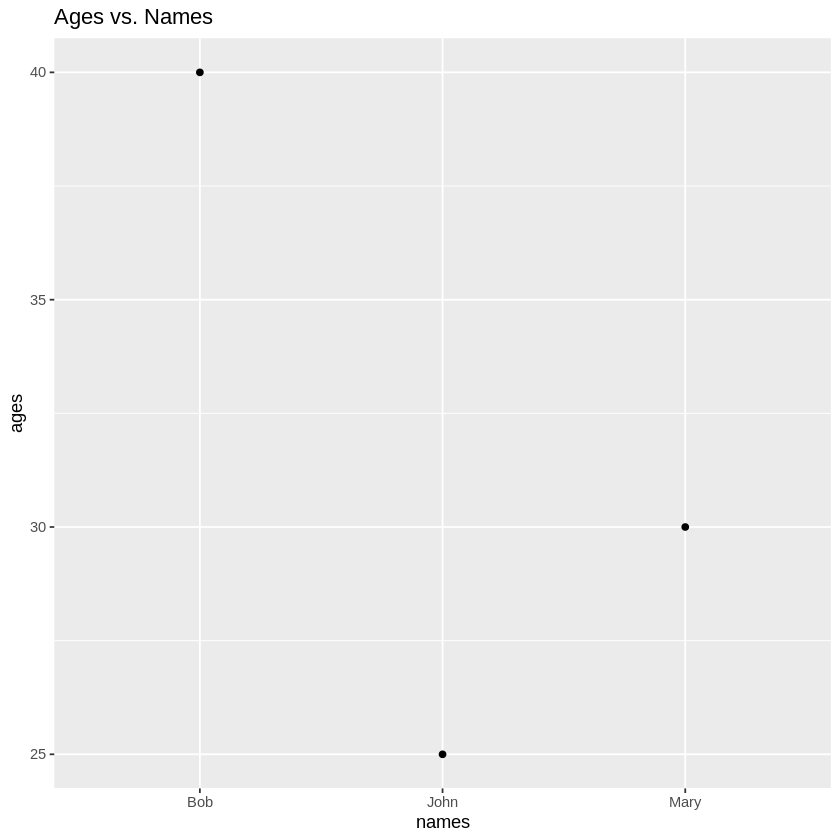

In [9]:

# Create a vector of numbers
numbers <- c(1, 2, 3, 4, 5)

# Print the vector
print(numbers)

# Create a data frame of names and ages
names <- c("John", "Mary", "Bob")
ages <- c(25, 30, 40)
df <- data.frame(names, ages)

# Print the data frame
print(df)

# Calculate the mean of the numbers vector
mean_age <- mean(ages)
print(mean_age)

# Create a bar chart of the ages
barplot(ages, names.arg = names, main = "Ages of People")

# Load the ggplot2 package
library(ggplot2)

# Create a scatter plot of ages vs. names using ggplot2
ggplot(df, aes(x = names, y = ages)) +
  geom_point() +
  labs(title = "Ages vs. Names")

In [12]:
library(tidyr)

# Create a data frame in long format
df <- data.frame(
  id = c(1, 1, 2, 2, 3, 3),
  year = c(2020, 2021, 2020, 2021, 2020, 2021),
  value = c(10, 15, 20, 25, 30, 35)
)

# Spread the data into wide format
df_wide <- spread(df, year, value)

# Print the resulting data frame
print(df_wide)

  id 2020 2021
1  1   10   15
2  2   20   25
3  3   30   35


In [16]:

install.packages(c('pacman', 'dplyr', 'tidyr', 'reshape2', 'readxl'))
pacman::p_load(pacman, dplyr, tidyr, reshape2, readxl)


Installing packages into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘plyr’, ‘Rcpp’




In [17]:

# Read data files
data_file <- '/content/Sample student data.xlsx'


In [18]:

credit_hrs <- read_xlsx(data_file, sheet = 1)
grads <- read_xlsx(data_file, sheet = 2)


In [19]:
credit_hrs

ID,Major,Semester,Credit_hours
<dbl>,<chr>,<chr>,<dbl>
1,Physics,Fall 2022,12
1,Physics,Spring 2023,9
2,English,Fall 2022,10
3,History,Spring 2023,15
4,Physics,Fall 2022,12
4,Physics,Summer 2023,6
5,Psychology,Fall 2022,11
6,History,Fall 2022,9
6,History,Spring 2023,14


In [20]:
grads

Academic_year,Male,Female
<chr>,<dbl>,<dbl>
2022-23,1178,1960
2021-22,1339,2127
2020-21,1604,2442
2019-20,1583,2278


In [21]:

# Converting from long to wide using spread()

credit_wide <- credit_hrs %>%
  spread(Semester, Credit_hours) %>%
  replace(is.na(.), 0)

credit_wide


ID,Major,Fall 2022,Spring 2023,Summer 2023
<dbl>,<chr>,<dbl>,<dbl>,<dbl>
1,Physics,12,9,0
2,English,10,0,0
3,History,0,15,0
4,Physics,12,0,6
5,Psychology,11,0,0
6,History,9,14,3


In [22]:

# # Converting from long to wide using dcast()

credit_wide <- credit_hrs %>%
  dcast(ID + Major ~ Semester, value.var = 'Credit_hours') %>%
  replace(is.na(.), 0)

credit_wide

ID,Major,Fall 2022,Spring 2023,Summer 2023
<dbl>,<chr>,<dbl>,<dbl>,<dbl>
1,Physics,12,9,0
2,English,10,0,0
3,History,0,15,0
4,Physics,12,0,6
5,Psychology,11,0,0
6,History,9,14,3


In [27]:

# Converting back to long format using gather()

credit_long <- credit_wide %>%
  gather(Semester, Credit_hours, `Fall 2022`,`Summer 2023`)

credit_long

ID,Major,Spring 2023,Semester,Credit_hours
<dbl>,<chr>,<dbl>,<chr>,<dbl>
1,Physics,9,Fall 2022,12
2,English,0,Fall 2022,10
3,History,15,Fall 2022,0
4,Physics,0,Fall 2022,12
5,Psychology,0,Fall 2022,11
6,History,14,Fall 2022,9
1,Physics,9,Summer 2023,0
2,English,0,Summer 2023,0
3,History,15,Summer 2023,0


In [31]:
# Converting back to long format using melt()

credit_long <- credit_wide %>%
  melt(id.vars = c('ID', 'Major'),
       variable.name = 'Semester',
       value.name = 'Credit_hours') %>%
  filter(Credit_hours > 0)

credit_long

ID,Major,Semester,Credit_hours
<dbl>,<chr>,<fct>,<dbl>
1,Physics,Fall 2022,12
2,English,Fall 2022,10
4,Physics,Fall 2022,12
5,Psychology,Fall 2022,11
6,History,Fall 2022,9
1,Physics,Spring 2023,9
3,History,Spring 2023,15
6,History,Spring 2023,14
4,Physics,Summer 2023,6


In [34]:
grads

Academic_year,Male,Female
<chr>,<dbl>,<dbl>
2022-23,1178,1960
2021-22,1339,2127
2020-21,1604,2442
2019-20,1583,2278


In [32]:

# Transpose the grads table by converting it to long form, and then to wide form
grads_long <- grads %>%
  gather(Gender, Graduates, Male:Female)

grads_long


Academic_year,Gender,Graduates
<chr>,<chr>,<dbl>
2022-23,Male,1178
2021-22,Male,1339
2020-21,Male,1604
2019-20,Male,1583
2022-23,Female,1960
2021-22,Female,2127
2020-21,Female,2442
2019-20,Female,2278


In [33]:

grads_wide <- grads_long %>%
  spread(Academic_year, Graduates)

grads_wide



Gender,2019-20,2020-21,2021-22,2022-23
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
Female,2278,2442,2127,1960
Male,1583,1604,1339,1178


In [35]:
t(grads)

Academic_year,2022-23,2021-22,2020-21,2019-20
Male,1178,1339,1604,1583
Female,1960,2127,2442,2278
